# Pandas DataFrame for storing tweet feed (total 12 points)

Creating following date frame for storing tweets

- **climate_feed_df** DataFrame for storing tweet
- **retweeted_status_df** for storing original tweet

In [69]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp
from datetime import datetime
from lxml import html



In [70]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

--2020-10-25 22:36:31--  https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/retweeted_status_df.pkl [following]
--2020-10-25 22:36:32--  https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/retweeted_status_df.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.68.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13793850 (13M) [application/octet-stream]
Saving to: ‘retweeted_status_df.pkl.5’

retweeted_status_df 100%[===================>]  13.15M  20.2MB/s    in 0.7s    

2020-10-25 22:36:33 (20.2 MB/s) - ‘retweeted_status_df.pkl.5’ saved [13793850/1

In [71]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

--2020-10-25 22:36:35--  https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/climate_feed.pkl [following]
--2020-10-25 22:36:36--  https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/climate_feed.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.68.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9122192 (8.7M) [application/octet-stream]
Saving to: ‘climate_feed.pkl.5’

climate_feed.pkl.5  100%[===================>]   8.70M  16.8MB/s    in 0.5s    

2020-10-25 22:36:37 (16.8 MB/s) - ‘climate_feed.pkl.5’ saved [9122192/9122192]



<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pkl file in the same directory as notebook

In [72]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")
#retweeted = pd.read_pickle("./q5_dataframe.pkl") Thsi was not working. 
#tweet = pd.read_pickle("./q5_dataframe.pkl")

In [73]:
retweeted_status_df

contributors coordinates                      created_at  \
0              NaN         NaN                             NaN   
1              NaN        None  Sat Feb 09 20:27:45 +0000 2019   
2              NaN        None  Sat Feb 09 23:56:18 +0000 2019   
3              NaN        None  Sat Feb 09 23:34:27 +0000 2019   
4              NaN        None  Sat Feb 09 19:07:56 +0000 2019   
5              NaN        None  Sat Feb 09 23:41:20 +0000 2019   
6              NaN        None  Sat Feb 09 16:44:41 +0000 2019   
7              NaN         NaN                             NaN   
8              NaN        None  Sat Feb 09 20:41:00 +0000 2019   
9              NaN         NaN                             NaN   
10             NaN         NaN                             NaN   
11             NaN         NaN                             NaN   
12             NaN        None  Sat Feb 09 16:33:00 +0000 2019   
13             NaN        None  Sun Feb 10 00:11:00 +0000 2019   
14             NaN        None  Thu Feb 07 18:12:00 +0000 2019   
15             NaN         NaN                             NaN   
16             NaN         NaN                             NaN   
17             NaN        None  Sat Feb 09 20:50:00 +0000 2019   
18             NaN        None  Thu Jan 31 15:13:28 +0000 2019   
19             NaN         NaN                             NaN   
20             NaN        None  Sun Feb 10 00:14:31 +0000 2019   
21             NaN        None  Sat Feb 09 23:21:06 +0000 2019   
22             NaN         NaN                             NaN   
23             NaN        None  Sat Feb 09 23:05:00 +0000 2019   
24             NaN        None  Sat Feb 09 21:19:46 +0000 2019   
25             NaN         NaN                             NaN   
26             NaN        None  Sat Feb 09 20:37:41 +0000 2019   
27             NaN        None  Sat Feb 09 21:10:19 +0000 2019   
28             NaN        None  Sat Feb 09 18:33:00 +0000 2019   
29             NaN        None  Sat Feb 09 20:37:41 +0000 2019   
...            ...         ...                             ...   
9969           NaN        None  Sat Feb 09 19:07:56 +0000 2019   
9970           NaN        None  Sat Feb 09 18:33:00 +0000 2019   
9971           NaN         NaN                             NaN   
9972           NaN        None  Sat Feb 09 15:45:04 +0000 2019   
9973           NaN        None  Sat Feb 09 16:17:27 +0000 2019   
9974           NaN        None  Sat Feb 09 12:29:32 +0000 2019   
9975           NaN        None  Sat Feb 09 01:41:51 +0000 2019   
9976           NaN        None  Wed Feb 06 19:12:11 +0000 2019   
9977           NaN        None  Sat Feb 09 12:29:32 +0000 2019   
9978           NaN        None  Sat Feb 09 20:50:01 +0000 2019   
9979           NaN        None  Sat Feb 09 19:07:56 +0000 2019   
9980           NaN        None  Sat Feb 09 18:33:00 +0000 2019   
9981           NaN         NaN                             NaN   
9982           NaN        None  Sat Feb 09 20:53:53 +0000 2019   
9983           NaN        None  Fri Feb 08 14:28:41 +0000 2019   
9984           NaN         NaN                             NaN   
9985           NaN        None  Sat Feb 09 20:44:50 +0000 2019   
9986           NaN         NaN                             NaN   
9987           NaN        None  Sat Feb 09 01:46:39 +0000 2019   
9988           NaN        None  Sat Feb 09 20:03:29 +0000 2019   
9989           NaN        None  Sat Feb 09 18:33:00 +0000 2019   
9990           NaN        None  Sat Feb 09 20:53:49 +0000 2019   
9991           NaN        None  Sat Feb 09 19:07:56 +0000 2019   
9992           NaN        None  Sat Feb 09 07:15:41 +0000 2019   
9993           NaN        None  Fri Feb 08 22:32:27 +0000 2019   
9994           NaN        None  Sat Feb 09 20:56:39 +0000 2019   
9995           NaN        None  Thu Feb 07 20:27:55 +0000 2019   
9996           NaN        None  Sat Feb 09 18:33:00 +0000 2019   
9997           NaN        None  Fri Feb 08 22:

In [74]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

contributors coordinates                      created_at  \
0            None        None  Sun Feb 10 00:17:31 +0000 2019   
1            None        None  Sun Feb 10 00:17:30 +0000 2019   
2            None        None  Sun Feb 10 00:17:26 +0000 2019   
3            None        None  Sun Feb 10 00:17:24 +0000 2019   
4            None        None  Sun Feb 10 00:17:23 +0000 2019   
5            None        None  Sun Feb 10 00:17:21 +0000 2019   
6            None        None  Sun Feb 10 00:17:21 +0000 2019   
7            None        None  Sun Feb 10 00:17:20 +0000 2019   
8            None        None  Sun Feb 10 00:17:19 +0000 2019   
9            None        None  Sun Feb 10 00:17:18 +0000 2019   
10           None        None  Sun Feb 10 00:17:18 +0000 2019   
11           None        None  Sun Feb 10 00:17:17 +0000 2019   
12           None        None  Sun Feb 10 00:17:14 +0000 2019   
13           None        None  Sun Feb 10 00:17:14 +0000 2019   
14           None        None  Sun Feb 10 00:17:14 +0000 2019   
15           None        None  Sun Feb 10 00:17:12 +0000 2019   
16           None        None  Sun Feb 10 00:17:12 +0000 2019   
17           None        None  Sun Feb 10 00:17:11 +0000 2019   
18           None        None  Sun Feb 10 00:17:10 +0000 2019   
19           None        None  Sun Feb 10 00:17:09 +0000 2019   
20           None        None  Sun Feb 10 00:17:06 +0000 2019   
21           None        None  Sun Feb 10 00:17:02 +0000 2019   
22           None        None  Sun Feb 10 00:17:02 +0000 2019   
23           None        None  Sun Feb 10 00:17:01 +0000 2019   
24           None        None  Sun Feb 10 00:17:01 +0000 2019   
25           None        None  Sun Feb 10 00:17:00 +0000 2019   
26           None        None  Sun Feb 10 00:16:59 +0000 2019   
27           None        None  Sun Feb 10 00:16:57 +0000 2019   
28           None        None  Sun Feb 10 00:16:56 +0000 2019   
29           None        None  Sun Feb 10 00:16:55 +0000 2019   
...           ...         ...                             ...   
9969         None        None  Sat Feb 09 20:58:26 +0000 2019   
9970         None        None  Sat Feb 09 20:58:25 +0000 2019   
9971         None        None  Sat Feb 09 20:58:24 +0000 2019   
9972         None        None  Sat Feb 09 20:58:22 +0000 2019   
9973         None        None  Sat Feb 09 20:58:22 +0000 2019   
9974         None        None  Sat Feb 09 20:58:20 +0000 2019   
9975         None        None  Sat Feb 09 20:58:20 +0000 2019   
9976         None        None  Sat Feb 09 20:58:17 +0000 2019   
9977         None        None  Sat Feb 09 20:58:17 +0000 2019   
9978         None        None  Sat Feb 09 20:58:15 +0000 2019   
9979         None        None  Sat Feb 09 20:58:15 +0000 2019   
9980         None        None  Sat Feb 09 20:58:12 +0000 2019   
9981         None        None  Sat Feb 09 20:58:11 +0000 2019   
9982         None        None  Sat Feb 09 20:58:11 +0000 2019   
9983         None        None  Sat Feb 09 20:58:10 +0000 2019   
9984         None        None  Sat Feb 09 20:58:10 +0000 2019   
9985         None        None  Sat Feb 09 20:58:09 +0000 2019   
9986         None        None  Sat Feb 09 20:58:08 +0000 2019   
9987         None        None  Sat Feb 09 20:58:05 +0000 2019   
9988         None        None  Sat Feb 09 20:58:05 +0000 2019   
9989         None        None  Sat Feb 09 20:58:05 +0000 2019   
9990         None        None  Sat Feb 09 20:58:04 +0000 2019   
9991         None        None  Sat Feb 09 20:58:00 +0000 2019   
9992         None        None  Sat Feb 09 20:57:58 +0000 2019   
9993         None        None  Sat Feb 09 20:57:58 +0000 2019   
9994         None        None  Sat Feb 09 20:57:54 +0000 2019   
9995         None        None  Sat Feb 09 20:57:54 +0000 2019   
9996         None        None  Sat Feb 09 20:57:53 +0000 2019   
9997         None        None  Sat Feb 09 20:57:51 +0000 2019   
9998         None        None  Sat Feb 0

Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [77]:
climate_feed_df.dtypes


contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) replace None with nan in climate_feed_df. Also display some random rows.


In [78]:
# write code here

climate_feed_df = climate_feed_df.replace('None', 'NaN')
climate_feed_df
climate_feed_df.sample(10)

contributors coordinates                      created_at  \
1494          NaN         NaN  Sat Feb 09 23:48:33 +0000 2019   
2754          NaN         NaN  Sat Feb 09 23:25:40 +0000 2019   
2358          NaN         NaN  Sat Feb 09 23:32:50 +0000 2019   
3095          NaN         NaN  Sat Feb 09 23:18:57 +0000 2019   
8389          NaN         NaN  Sat Feb 09 21:28:14 +0000 2019   
4195          NaN         NaN  Sat Feb 09 22:55:27 +0000 2019   
7906          NaN         NaN  Sat Feb 09 21:38:11 +0000 2019   
9040          NaN         NaN  Sat Feb 09 21:15:43 +0000 2019   
5716          NaN         NaN  Sat Feb 09 22:22:20 +0000 2019   
596           NaN         NaN  Sun Feb 10 00:05:06 +0000 2019   

                                               entities  \
1494  {'hashtags': [], 'user_mentions': [{'id_str': ...   
2754  {'hashtags': [], 'user_mentions': [{'id_str': ...   
2358  {'hashtags': [], 'user_mentions': [{'id_str': ...   
3095  {'hashtags': [], 'user_mentions': [{'id_str': ...   
8389  {'hashtags': [], 'user_mentions': [{'id_str': ...   
4195  {'hashtags': [{'indices': [88, 101], 'text': '...   
7906  {'hashtags': [], 'user_mentions': [{'id_str': ...   
9040  {'hashtags': [], 'user_mentions': [{'id_str': ...   
5716  {'hashtags': [], 'user_mentions': [{'id_str': ...   
596   {'hashtags': [], 'user_mentions': [], 'urls': ...   

                                      extended_entities favorite_count  \
1494                                                NaN              0   
2754                                                NaN              0   
2358                                                NaN              0   
3095                                                NaN              0   
8389                                                NaN              0   
4195                                                NaN              0   
7906                                                NaN              0   
9040                                                NaN              0   
5716                                                NaN              0   
596   {'media': [{'id_str': '1094386739936804864', '...              0   

     favorited  geo                   id               id_str  \
1494     False  NaN  1094382577430003712  1094382577430003712   
2754     False  NaN  1094376816825982976  1094376816825982976   
2358     False  NaN  1094378619944615936  1094378619944615936   
3095     False  NaN  1094375127469514752  1094375127469514752   
8389     False  NaN  1094347262967218176  1094347262967218176   
4195     False  NaN  1094369213286887431  1094369213286887431   
7906     False  NaN  1094349769844162561  1094349769844162561   
9040     False  NaN  1094344114781474817  1094344114781474817   
5716     False  NaN  1094360877728497664  1094360877728497664   
596      False  NaN  1094386741715263488  1094386741715263488   

             ...         quoted_status     quoted_status_id  \
1494         ...                   NaN  1094014590705430528   
2754         ...                   NaN  1094261389592547329   
2358         ...                   NaN                  NaN   
3095         ...                   NaN                  NaN   
8389         ...                   NaN                  NaN   
4195         ...                   NaN                  NaN   
7906         ...                   NaN                  NaN   
9040         ...                   NaN  1094147811002802176   
5716         ...                   NaN                  NaN   
596          ...                   NaN                  NaN   

     quoted_status_id_str retweet_count retweeted retweeted_status  \
1494  1094014590705430528             6     False     1.094363e+18   
2754  1094261389592547329             1     False     1.094267e+18   
2358                  NaN             0     False              NaN   
3095                  NaN            45     False     1.094369e+18   
8389                  NaN            28     False     1.094345e+

Working with only selected attributes.

In [79]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [80]:
climate_feed_df.sample(10)

created_at  \
4475  Sat Feb 09 22:48:45 +0000 2019   
4282  Sat Feb 09 22:53:26 +0000 2019   
7779  Sat Feb 09 21:41:05 +0000 2019   
6226  Sat Feb 09 22:11:50 +0000 2019   
7317  Sat Feb 09 21:49:46 +0000 2019   
2415  Sat Feb 09 23:31:38 +0000 2019   
544   Sun Feb 10 00:06:22 +0000 2019   
4779  Sat Feb 09 22:41:06 +0000 2019   
4029  Sat Feb 09 22:59:06 +0000 2019   
8463  Sat Feb 09 21:26:47 +0000 2019   

                                               entities  retweeted_status  \
4475  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094303e+18   
4282  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
7779  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094253e+18   
6226  {'hashtags': [{'indices': [18, 23], 'text': 'S...      1.094294e+18   
7317  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094305e+18   
2415  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094376e+18   
544   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094373e+18   
4779  {'hashtags': [{'indices': [74, 83], 'text': 'I...      1.094362e+18   
4029  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094299e+18   
8463  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094212e+18   

      truncated              user_id  \
4475       True           2394578373   
4282       True           4092210313   
7779       True            584939698   
6226       True           3148976720   
7317       True            292137928   
2415       True             33729893   
544        True  1059503268944994304   
4779       True           2241205392   
4029       True            102227086   
8463       True   824310497658867713   

                                                   text  
4475  RT @SenSanders: President Trump believes we sh...  
4282  @AOC, I am going to count down the days\nOnly ...  
7779  RT @ChrisvandenBos: Er komen steeds meer aanwi...  
6226  RT @HeinzVHoenen: #SDGs #Climate \n\nClimate C...  
7317  RT @sunlorrie: In fact, calling any transit pr...  
2415  RT @drawandstrike: THIS is why on almost every...  
544   RT @ScienceNews: Climate change trends suggest...  
4779  RT @GrogsGamut: What utter nothingness on clim...  
4029  RT @ArielAnaliza: Masacre de 56 millones de in...  
8463  RT @marklevinshow: The insane Democrat Left.  ...

# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [82]:
# write code here
climate_feed_df['created_at']=pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df['truncated']=climate_feed_df['truncated'].astype(bool)
climate_feed_df.dtypes

created_at          datetime64[ns]
entities                    object
retweeted_status           float64
truncated                     bool
user_id                      int64
text                        object
dtype: object

Checking datatype again

In [83]:
climate_feed_df.dtypes

created_at          datetime64[ns]
entities                    object
retweeted_status           float64
truncated                     bool
user_id                      int64
text                        object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [85]:
# write code here
climate_feed_df.isnull().sum()

created_at             0
entities               0
retweeted_status    2690
truncated              0
user_id                0
text                   0
dtype: int64

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a columns named hashtags. Values in this columns should be command separated values of **text** attribute in **hashtags**  value.
 - Create a columns named user_mentions.Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [15]:
# write code here
import ast
#print(climate_feed_df['entities'])
#ast.literal_eval(climate_feed_df['entities'])
climate_feed_df['hashtags'] = climate_feed_df.text.str.findall(r'#.*?(?=\s|$)')
#print(climate_feed_df['hashtags'])
climate_feed_df['user_mentions'] = climate_feed_df.text.str.findall(r'@.*?(?=\s|$)')
#0print(climate_feed_df['user_mentions'])
climate_feed_df

created_at  \
0     Sun Feb 10 00:17:31 +0000 2019   
1     Sun Feb 10 00:17:30 +0000 2019   
2     Sun Feb 10 00:17:26 +0000 2019   
3     Sun Feb 10 00:17:24 +0000 2019   
4     Sun Feb 10 00:17:23 +0000 2019   
5     Sun Feb 10 00:17:21 +0000 2019   
6     Sun Feb 10 00:17:21 +0000 2019   
7     Sun Feb 10 00:17:20 +0000 2019   
8     Sun Feb 10 00:17:19 +0000 2019   
9     Sun Feb 10 00:17:18 +0000 2019   
10    Sun Feb 10 00:17:18 +0000 2019   
11    Sun Feb 10 00:17:17 +0000 2019   
12    Sun Feb 10 00:17:14 +0000 2019   
13    Sun Feb 10 00:17:14 +0000 2019   
14    Sun Feb 10 00:17:14 +0000 2019   
15    Sun Feb 10 00:17:12 +0000 2019   
16    Sun Feb 10 00:17:12 +0000 2019   
17    Sun Feb 10 00:17:11 +0000 2019   
18    Sun Feb 10 00:17:10 +0000 2019   
19    Sun Feb 10 00:17:09 +0000 2019   
20    Sun Feb 10 00:17:06 +0000 2019   
21    Sun Feb 10 00:17:02 +0000 2019   
22    Sun Feb 10 00:17:02 +0000 2019   
23    Sun Feb 10 00:17:01 +0000 2019   
24    Sun Feb 10 00:17:01 +0000 2019   
25    Sun Feb 10 00:17:00 +0000 2019   
26    Sun Feb 10 00:16:59 +0000 2019   
27    Sun Feb 10 00:16:57 +0000 2019   
28    Sun Feb 10 00:16:56 +0000 2019   
29    Sun Feb 10 00:16:55 +0000 2019   
...                              ...   
9969  Sat Feb 09 20:58:26 +0000 2019   
9970  Sat Feb 09 20:58:25 +0000 2019   
9971  Sat Feb 09 20:58:24 +0000 2019   
9972  Sat Feb 09 20:58:22 +0000 2019   
9973  Sat Feb 09 20:58:22 +0000 2019   
9974  Sat Feb 09 20:58:20 +0000 2019   
9975  Sat Feb 09 20:58:20 +0000 2019   
9976  Sat Feb 09 20:58:17 +0000 2019   
9977  Sat Feb 09 20:58:17 +0000 2019   
9978  Sat Feb 09 20:58:15 +0000 2019   
9979  Sat Feb 09 20:58:15 +0000 2019   
9980  Sat Feb 09 20:58:12 +0000 2019   
9981  Sat Feb 09 20:58:11 +0000 2019   
9982  Sat Feb 09 20:58:11 +0000 2019   
9983  Sat Feb 09 20:58:10 +0000 2019   
9984  Sat Feb 09 20:58:10 +0000 2019   
9985  Sat Feb 09 20:58:09 +0000 2019   
9986  Sat Feb 09 20:58:08 +0000 2019   
9987  Sat Feb 09 20:58:05 +0000 2019   
9988  Sat Feb 09 20:58:05 +0000 2019   
9989  Sat Feb 09 20:58:05 +0000 2019   
9990  Sat Feb 09 20:58:04 +0000 2019   
9991  Sat Feb 09 20:58:00 +0000 2019   
9992  Sat Feb 09 20:57:58 +0000 2019   
9993  Sat Feb 09 20:57:58 +0000 2019   
9994  Sat Feb 09 20:57:54 +0000 2019   
9995  Sat Feb 09 20:57:54 +0000 2019   
9996  Sat Feb 09 20:57:53 +0000 2019   
9997  Sat Feb 09 20:57:51 +0000 2019   
9998  Sat Feb 09 20:57:51 +0000 2019   

                                               entities  retweeted_status  \
0     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
1     {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094332e+18   
2     {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094385e+18   
3     {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094379e+18   
4     {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094312e+18   
5     {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094381e+18   
6     {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094276e+18   
7     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
8     {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094335e+18   
9     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
10    {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
11    {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
12    {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094273e+18   
13    {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094388e+18   
14    {'hashtags': [], 'user_mentions': [{'id_str': ...      1.093573e+18   
15    {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
16    {'hashtags': [{'indices': [109, 115], 'text': ...               NaN   
17    {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094338e+18   
18    {'hashtags': [], 'user_mentions': [{'id_str': ...      1.090991e+18   
19   

# Cleaning tweets

Let's see some random tweets

In [86]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

2118        RT @jules_su: Hey, shout out to Trump supporters falling over themselves trying to eviscerate @AOC over a single word in a summary that WAS…
1339      RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
296         RT @pcal4HIM: https://t.co/nGnmaoUWlT @BarackObama and George Soros attend United Nations conferences for Global Warming/Climate Change fun…
1937        RT @worldbankhater: capitalists went to war to sabotage socialist countries and people still think there’s such thing as a mix of capitalis…
1550    RT @ImranKhanPTI: We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li…
8977        RT @ABC: Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 percent of U.S. ene…
1365    RT @Jordan_Sather_: 🤣🤣🤣\n\nQuite the crock of shit, here!\n\nDon’t even tr

**Example of tweet not truncated**

In [87]:
climate_feed_df['text'].loc[3929]
#requests.get('https.//t.co/KPSCk6fjsa?')

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [88]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [89]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [90]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[12]].text.iloc[0]

'A price signal such as a carbon tax would address climate change by providing unbiased, neutral pressure across the… https://t.co/ySGQvAUpVr'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(points 3.5= 1(use of requests and text extraction from right html element)+.5+1+1 ) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [91]:
import base64
import json
client_key = 'EaK1c65rHgqLIhUF8i86RKEpo'
client_secret = 'UVp9UDoMRGGi5aFO2mrggPPbrDW5EoPSuMYPgMyRUa295y7RKA'

key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode("ascii")


In [92]:

base_url = 'https://api.twitter.com/'
auth_endpoint = base_url+'oauth2/token'
auth_headers = {"Authorization":"Basic {}".format(b64_encoded_key),
               'Content-Type':'application/x-www-form-urlencoded;charset=UTF-8'}

auth_data = {'grant_type':'client_credentials'}
response = requests.post(auth_endpoint,headers=auth_headers, data=auth_data)
response.status_code

json_data = response.json()
access_token = json_data['access_token']

search_headers = {"Authorization":'Bearer {}'.format(access_token)}


In [93]:
# Write code here
climate_feed_df['original_tweet_text'] = None

#climate_feed_df['original_tweet_text'].loc[1] = retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[1]].text.iloc[0]
climate_feed_df
for a in range(0,len(climate_feed_df)):
    try:
        climate_feed_df['original_tweet_text'].loc[a] = retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[a]].text.iloc[0]
        url = re.compile(r'http\S+').findall(climate_feed_df['original_tweet_text'].loc[a])
        print(url)
        try:
            if url != None:
                for a in url:
                    a = a.strip('')
                    req = requests.get(a)
                    soup = bsp(req.text, "html.parser")
                    tes = soup.find('span',attrs = {'class':"css-901oao css-16my406"})
                    tes = tes.text.strip()
                    if tes != 'Something went wrong, but don’t fret — let’s give it another shot.':
                        climate_feed_df['original_tweet_text'].loc[a] = tes
                        print(climate_feed_df['original_tweet_text'].loc[a])
                    else:
                        climate_feed_df['original_tweet_text'].loc[a] = None
                        print(climate_feed_df['original_tweet_text'].loc[a])
            
                
                    
        except AttributeError:
            print('Invalid URL')
                

    except IndexError:
        print('None')
        climate_feed_df['original_tweet_text'].loc[a] = None

climate_feed_df   
    
#This code results in the following error. ConnectionError: HTTPSConnectionPool(host='f-st.co', port=443):
#Max retries exceeded with url: /NQFsHHu (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fca6aaa5908>: 
#Failed to establish a new connection: [Errno 11] Resource temporarily unavailable',))


None
['https://t.co/G0PqMIEUMV']


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


None
['https://t.co/HWjCJGhQIx']
None
['https://t.co/2asxrk5Fqd']
None
['https://t.co/1J7lLUkYyY']
None
['https://t.co/gKQWMdKBaA']
None
[]
None
['https://t.co/hFLndZsiBB']
Invalid URL
None
None
None
['https://t.co/ySGQvAUpVr']
None
['https://t.co/HqReeyBp7L']
None
['https://t.co/JCnEio1JYC']
None
None
None
['https://t.co/War1yOucT0']
None
['https://t.co/lJsJZjNz3K', 'https://t.co/DGIhPitOpD']
Invalid URL
None
['https://t.co/BjiDztv1v2']


ConnectionError: HTTPSConnectionPool(host='f-st.co', port=443): Max retries exceeded with url: /NQFsHHu (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5bfa684860>: Failed to establish a new connection: [Errno 11] Resource temporarily unavailable',))

# Q 6(point 1= .5+.5) Remove all the reference  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [94]:
climate_feed_df['text']= climate_feed_df["text"].str.replace("RT","")
climate_feed_df['text']= climate_feed_df["text"].str.replace(r'@.*?(?=\s|$)',"")
climate_feed_df['text']= climate_feed_df["text"].str.replace(r'https.*?(?=\s|$)',"")
climate_feed_df

created_at  \
0    2019-02-10 00:17:31   
1    2019-02-10 00:17:30   
2    2019-02-10 00:17:26   
3    2019-02-10 00:17:24   
4    2019-02-10 00:17:23   
5    2019-02-10 00:17:21   
6    2019-02-10 00:17:21   
7    2019-02-10 00:17:20   
8    2019-02-10 00:17:19   
9    2019-02-10 00:17:18   
10   2019-02-10 00:17:18   
11   2019-02-10 00:17:17   
12   2019-02-10 00:17:14   
13   2019-02-10 00:17:14   
14   2019-02-10 00:17:14   
15   2019-02-10 00:17:12   
16   2019-02-10 00:17:12   
17   2019-02-10 00:17:11   
18   2019-02-10 00:17:10   
19   2019-02-10 00:17:09   
20   2019-02-10 00:17:06   
21   2019-02-10 00:17:02   
22   2019-02-10 00:17:02   
23   2019-02-10 00:17:01   
24   2019-02-10 00:17:01   
25   2019-02-10 00:17:00   
26   2019-02-10 00:16:59   
27   2019-02-10 00:16:57   
28   2019-02-10 00:16:56   
29   2019-02-10 00:16:55   
...                  ...   
9969 2019-02-09 20:58:26   
9970 2019-02-09 20:58:25   
9971 2019-02-09 20:58:24   
9972 2019-02-09 20:58:22   
9973 2019-02-09 20:58:22   
9974 2019-02-09 20:58:20   
9975 2019-02-09 20:58:20   
9976 2019-02-09 20:58:17   
9977 2019-02-09 20:58:17   
9978 2019-02-09 20:58:15   
9979 2019-02-09 20:58:15   
9980 2019-02-09 20:58:12   
9981 2019-02-09 20:58:11   
9982 2019-02-09 20:58:11   
9983 2019-02-09 20:58:10   
9984 2019-02-09 20:58:10   
9985 2019-02-09 20:58:09   
9986 2019-02-09 20:58:08   
9987 2019-02-09 20:58:05   
9988 2019-02-09 20:58:05   
9989 2019-02-09 20:58:05   
9990 2019-02-09 20:58:04   
9991 2019-02-09 20:58:00   
9992 2019-02-09 20:57:58   
9993 2019-02-09 20:57:58   
9994 2019-02-09 20:57:54   
9995 2019-02-09 20:57:54   
9996 2019-02-09 20:57:53   
9997 2019-02-09 20:57:51   
9998 2019-02-09 20:57:51   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             entities  \
0                                                                                                                                                                                                                       {'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}   
1                                                                                                                                                                                                                                                                                                                                                                                                 {'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}   
2                                                                                                                                                                                         {'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}   
3

# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words doesn't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [95]:
# wite code here
climate_feed_df['final_tweet_text'] = ''
climate_feed_df['final_tweet_text'].astype(str)
climate_feed_df['original_tweet_text'].astype(str)
climate_feed_df['text'].astype(str)

for a in range(0,len(climate_feed_df)):
    if climate_feed_df['original_tweet_text'].loc[a] == None:
        climate_feed_df['final_tweet_text'].loc[a] = climate_feed_df['text'].loc[a]
    else:
        #print(climate_feed_df['text'][a][:10])
        if climate_feed_df['text'][a][:10] == climate_feed_df['original_tweet_text'][a][:10]:
            climate_feed_df['final_tweet_text'][a] == climate_feed_df['original_tweet_text'][a]
        else:
            climate_feed_df['final_tweet_text'][a] == climate_feed_df['text'][a]
            
            
            

In [96]:
climate_feed_df
 

created_at  \
0    2019-02-10 00:17:31   
1    2019-02-10 00:17:30   
2    2019-02-10 00:17:26   
3    2019-02-10 00:17:24   
4    2019-02-10 00:17:23   
5    2019-02-10 00:17:21   
6    2019-02-10 00:17:21   
7    2019-02-10 00:17:20   
8    2019-02-10 00:17:19   
9    2019-02-10 00:17:18   
10   2019-02-10 00:17:18   
11   2019-02-10 00:17:17   
12   2019-02-10 00:17:14   
13   2019-02-10 00:17:14   
14   2019-02-10 00:17:14   
15   2019-02-10 00:17:12   
16   2019-02-10 00:17:12   
17   2019-02-10 00:17:11   
18   2019-02-10 00:17:10   
19   2019-02-10 00:17:09   
20   2019-02-10 00:17:06   
21   2019-02-10 00:17:02   
22   2019-02-10 00:17:02   
23   2019-02-10 00:17:01   
24   2019-02-10 00:17:01   
25   2019-02-10 00:17:00   
26   2019-02-10 00:16:59   
27   2019-02-10 00:16:57   
28   2019-02-10 00:16:56   
29   2019-02-10 00:16:55   
...                  ...   
9969 2019-02-09 20:58:26   
9970 2019-02-09 20:58:25   
9971 2019-02-09 20:58:24   
9972 2019-02-09 20:58:22   
9973 2019-02-09 20:58:22   
9974 2019-02-09 20:58:20   
9975 2019-02-09 20:58:20   
9976 2019-02-09 20:58:17   
9977 2019-02-09 20:58:17   
9978 2019-02-09 20:58:15   
9979 2019-02-09 20:58:15   
9980 2019-02-09 20:58:12   
9981 2019-02-09 20:58:11   
9982 2019-02-09 20:58:11   
9983 2019-02-09 20:58:10   
9984 2019-02-09 20:58:10   
9985 2019-02-09 20:58:09   
9986 2019-02-09 20:58:08   
9987 2019-02-09 20:58:05   
9988 2019-02-09 20:58:05   
9989 2019-02-09 20:58:05   
9990 2019-02-09 20:58:04   
9991 2019-02-09 20:58:00   
9992 2019-02-09 20:57:58   
9993 2019-02-09 20:57:58   
9994 2019-02-09 20:57:54   
9995 2019-02-09 20:57:54   
9996 2019-02-09 20:57:53   
9997 2019-02-09 20:57:51   
9998 2019-02-09 20:57:51   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             entities  \
0                                                                                                                                                                                                                       {'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}   
1                                                                                                                                                                                                                                                                                                                                                                                                 {'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}   
2                                                                                                                                                                                         {'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}   
3

# Emoji detection

See this example of emoji as unicode characters

In [27]:
climate_feed_df['final_tweet_text'].loc[3931]

' Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [97]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [98]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [99]:
! pip install emoji

In [100]:
import emoji

In [101]:
emoji.UNICODE_EMOJI

{'🥇': ':1st_place_medal:',
 '🥈': ':2nd_place_medal:',
 '🥉': ':3rd_place_medal:',
 '🆎': ':AB_button_(blood_type):',
 '🏧': ':ATM_sign:',
 '🅰': ':A_button_(blood_type):',
 '🅰️': ':A_button_(blood_type)_selector:',
 '🇦🇫': ':Afghanistan:',
 '🇦🇽': ':Aland_Islands:',
 '🇦🇱': ':Albania:',
 '🇩🇿': ':Algeria:',
 '🇦🇸': ':American_Samoa:',
 '🇦🇩': ':Andorra:',
 '🇦🇴': ':Angola:',
 '🇦🇮': ':Anguilla:',
 '🇦🇶': ':Antarctica:',
 '🇦🇬': ':Antigua_&_Barbuda:',
 '♒': ':Aquarius:',
 '🇦🇷': ':Argentina:',
 '♈': ':Aries:',
 '🇦🇲': ':Armenia:',
 '🇦🇼': ':Aruba:',
 '🇦🇨': ':Ascension_Island:',
 '🇦🇺': ':Australia:',
 '🇦🇹': ':Austria:',
 '🇦🇿': ':Azerbaijan:',
 '🔙': ':BACK_arrow:',
 '🅱': ':B_button_(blood_type):',
 '🅱️': ':B_button_(blood_type)_selector:',
 '🇧🇸': ':Bahamas:',
 '🇧🇭': ':Bahrain:',
 '🇧🇩': ':Bangladesh:',
 '🇧🇧': ':Barbados:',
 '🇧🇾': ':Belarus:',
 '🇧🇪': ':Belgium:',
 '🇧🇿': ':Belize:',
 '🇧🇯': ':Benin:',
 '🇧🇲': ':Bermuda:',
 '🇧🇹': ':Bhutan:',
 '🇧🇴': ':Bolivia:',
 '🇧🇦': ':Bosnia_&_Herzegovina:',
 '🇧🇼': ':Botswana

# Q 8(1 point) Create a column  called *emoji*.  This coumns should contains a list of tuples for emoji detected in *final_tweet_text*. First element of tuple is the emoji detected and second is the text describing the emoji.

In [102]:
# write code here

climate_feed_df['emoji'] = ''
for a in range(0, len(climate_feed_df)):
    e = []
    for b in climate_feed_df['final_tweet_text'][a]:
        for c in emoji.UNICODE_EMOJI:
            if b == c:
                #print(climate_feed_df['final_tweet_text'][a])
                #print((c,emoji.UNICODE_EMOJI[c]))
                #e = []
                #e.append((c,emoji.UNICODE_EMOJI[c]))
                e.append((c,emoji.UNICODE_EMOJI[c]))
                climate_feed_df['emoji'][a] = e
            
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
for a in range(0, len(climate_feed_df)):
    print(climate_feed_df['final_tweet_text'][a])
    print( climate_feed_df['emoji'][a])

. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… 



  This is the same idiot who thought
The southern Alberta chinook was climate change lol. 

  Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…

  Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…

   Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…

  Happy Saturday! Friendly reminder that climate change is a hoax! 

Have a great day everyone!

  Yes, this downtown parking garage is a mess. PA City Council just adopted climate change as a… 

  Blue marble no more? 

Coming up next on CCTV's government channel (Comcast22/Verizon42)
2/9/2019 9:00:00 PM:     MVP on Climate Change Jan. 28, 2019

Yes! “Climate change is transnational and transgenerational.” Fr Bryan Hehir.    

     You 


  "the evidence that our diets are the largest cause of climate change and biodiversity loss is now overwhelming. The global…



  Masacre de 56 millones de indígenas durante conquista y colonización europea, causó enfriamiento del planeta. Guerra, des…

   Trump is underestimating the resolve of the American people when it comes to Climate Change and the Green Ne…

  I am proud to be an original co-sponsor of the Green New Deal proposal. We must address the existential crisis of planetary…

  White people won't believe in climate change but will believe in Groundhog Day

       

  Our opponents are REALLY, REALLY afraid! 

Not surprising they would want to exclude  after she destroyed the o…

  🤣🤣🤣

Quite the crock of shit, here!

Don’t even try to sell me your Geoengineering nonsense based off ridiculous climat…
[('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:')]
   And FYI climate change is real despite Tru

 We are in peril because of liberal nutcases like him trying to take us back a couple of centuries… 

   Donald Trump does not understand the cause or impact of global climate change. To him it’s all just a big…

   Donald Trump does not understand the cause or impact of global climate change. To him it’s all just a big…

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…



  I wasted my Saturday afternoon arguing about printer ink. This  thread covers more about digital freedom, econom…

  Except those scientists have been wrong for decades. None of their predictions have com… 

  Ruinously expensive describes our military budget and Republican tax cuts.  Addressing climate… 

None of my Utopian research in 2001 was about climate change either, it was more about a clean environment, a parad… 

  Items we only use once before tossing, like trash from takeout food, aren't helping the fight against climate change. 

  “We do not have a choice. We have to get to one hundred percent renewable energy in ten years. There is no other option…

   I think there is room for a UBI discussion as automation and AI mounts. Andrew Yan… 

  THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending any mo…

LOL, this mine does not produce coal for burning in power plants! This is coking coal to produce steel, you know th… 

Experts who have manipulated the so called climate change  data. 

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  "Tropical deforestation plays a huge role in driving climate change, human rights abuses &amp; biodiversity loss — and the large in…

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…

  Red herrings and wrong notes from Nats climate change spokesperson  via  on 

  🤣🤣🤣



  Poor old Everald is loosing it lately. 
First, got suched in to supporting the franking ha… 

Suncor CEO slams climate change deniers, politicians who cater to them | CBC News 

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…

    Sure can, the hoax is #Qanon and the jerkoff is Denise 😏
C… 
[('😏', ':smirking_face:')]
  nonsense, unless climate change is the same event that lead to similar outbreaks in 19661985 1994 and a host of other y…

  Climate change could lower krill growth rates—which means penguin populations could decline by as much as 30% as a resu…

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…

on Doonberg resort ireland DJT built a wall against climate change, really! And in US he denies the cl

   If you know what the challenge is with other people and you don't change your tactic… 

  A prominent medical commission has labelled the pandemics of climate change, obesity, and poor nutrition "The Global Sy…

  Items we only use once before tossing, like trash from takeout food, aren't helping the fight against climate change. Here a…

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…

  Why would a newspaper publish a letter (Con Vaitsas below) which is 100% untrue??
Anyone elected to State Parliament im…

  Let’s vote on the Green New Deal!
 
Americans deserve to see what kind of solutions far-left Democrats are offering to…

..::''The past decade has not been good for Biscayne Bay: More than 25,000 acres of seagrass meadows have vanished… 

Why Democrats say the U.S. needs a Green New Deal to combat climate change 

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fu


  I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be debt fr…

   US contribution to climate change has been falling as country grows poorer,… 

  We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li…

  Not only does this threaten many cities. It also threatens production of our favorite things. Coffee, wine, beer, bananas…

Veganism is the solution to world hunger and climate change! Meat, dairy and eggs are unsustainable! #GoVegan… 

  Australia PM adviser says climate change is 'UN-led ruse to establish new world order' -  Comment?         #ma4t  

  The #GreenNewDeal push has thrust climate change into the national conversation, put House Democrats on notice, and created…

  "I think he'll leave a legacy that he didn't care," said one Virginia activist. "He might as well be one of those saying th…

  Give it up fossils. It's over. 



Climate ch

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦

As Climate Change Returns to Capitol Hill, Disagreements Remain Among Democrats - The New Yorker 

   Um. The Catholic Church accepts climate change and advocates something needs… 

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…

  Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…

 When are you going to agree to debate someone on the right on the issues?

Socialism?
Climate Change?
Intersec… 

This is coinciding with pole reversal, which is nothing to do with human-caused climate change. Quite a few things… 

  God bless the climate reporters who painstainkingly write explainers on why winte

  “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦

Climate Change cannot be stopped by humans, unless we can change orbit of planet earth, cool the sun, or tilt earth… 

  Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…

  One of our duties as #OutdoorSports enthusiasts is to steward the land that provides us game. An important part of our #H…

  

OUCH! Pelosi Finalizes New Climate Change Committee, Look Who She glaringly omitted, "AOC" !! 
All O…

  Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 percent of U.S. ene…

 Meanwhile  just announced that Whitey is going back to the moon. Because climate change and inequality and all that nonsense.

  'Smacks of judicial activism': Nationals MP accused of contempt of court after Rocky Hill decision

(These gratuitous…

   of carbon d


    And to repeat, I do believe we need to be “responsible” with our climate… 

  Masacre de 56 millones de indígenas durante conquista y colonización europea, causó enfriamiento del planeta. Guerra, des…

  Love me some #GreenNewDeal but we're not talking seriously about climate change unless we're talking about animal agricu…

  BBC Climate Watch 9th Feb ‘19

Mentions of climate change on BBC website:

Homepage 0/69, News home 1/51, most read 1/10

T…

  The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…



Sharing community priorities like climate change, transit, walkable connected communities, affordable housing, loca… 

 Ice cold, coach! Climate change is real man

          

The profound idiocy of this comment as we head towards a climate change driven global conflagration on a scale not… 

  Climate action is about zeroing-out climate emissions.

Climate policy is about finding effective ways for governmen

 I actually couldn't care less if climate change really was a hoax, as long as it boils Shapiro's pi… 

  by climate change to no winter weather caused by warming climate change.  It's weather people...it changes. human bein…

   So destroy the climate because you might have to change. Nice.

  Nog leuker is eigenlijk de bescheiden terugblik van Michael Mann zelf, die het even in… 

  We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li…

  “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦

  So — if you actually believe climate change is the most serious issue we face right now, it's… 

  Both Obama and climate change are hoaxes!

  Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…

  The problem is that because the U.S. only produces 14% of global carbon emissions (and fa

 Absolute insanity.  Yes climate change must be addressed, but you don't need to destroy our entire e… 

 No one knows what will happen with climate change it’s all just speculation. If the planet become… 

  People are dying from poverty, no healthcare, gun violence &amp; climate change.
Yet, Admin wants a wall for their racist agenda…

  Speedskating on natural ice is a beloved Dutch national pastime, and the Elfstedentocht race is the apex of that tradition. Bu…

   Not just energy rationing, but rationing in general.  told school children to… 

  Speedskating on natural ice is a beloved Dutch national pastime, and the Elfstedentocht race is the apex of that tradition. Bu…

  'Smacks of judicial activism': Nationals MP accused of contempt of court after Rocky Hill decision

(These gratuitous…

  I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be debt fr…

  ‘Tony Abbott is out of touch," Ms Lyons said. "[He] has had 24 


  Climate change might be real, but it is 100% NOT human caused. It all part of the natural cycles… 

  "I'm a champion of the TSA, so let's abolish the DHS!"

"Abolish ICE!"

"Federal jobs guarantees to fight climate change…

 Not just orangutans, also my favorite bears; the Sun Bear. Climate change: 'Future proofing' forests to p… 

 All you skeptics and conspiracists.Your arguments against climate change are completely flawed. You'r… 

  I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be debt fr…

   Please explain why she was left off the climate change committee by Pelosi.

  Happy Saturday! Friendly reminder that climate change is a hoax! 

Have a great day everyone!

  How a top Republican aims to resist the Democratic climate change agenda 

  "Forests’ power to store carbon dioxide through the simple process of tree growth is staggering: one tree can store an…

  Just gonna throw this out there. If you believe in

  74% of Ontarians believe economists when they speak about our practical and affordable plan for fighting climate change. P…

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  Look what 16-year old  has started. An estimated 10,000 students marched through The Hague, Netherlands toda…

  In 2009/10, the Koch brothers, #BigOil, and others spent a fortune to kill climate change legislation. 

They will try to do…

  Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 percent of U.S. ene…

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦

  Scientific ignorance as irrational and as deadly as climate change denial. Phenomenal stupidity. 

  Our opponen


  ✒️  Alex Dehgan, alum Jay Sullivan &amp; co-author Chad Gallinat describe how market incentives can break down industr…
[('✒', ':black_nib:')]
  Recommended read: The truth about big oil and climate change |   

The Green New Deal and Medicare4All are NOT winning policies. They're unattainable unrealistic rainbows and unicorn… 

In the bible God warned of extreme conditions to come 4 forgetting to pray,the ten commandments and not helping the… 

  'Smacks of judicial activism': Nationals MP accused of contempt of court after Rocky Hill decision

(These gratuitous…

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  Scientific ignorance as irrational and as deadly as climate change denial. Phenomenal stupidity. 

  Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…

   "Gosh, those climate changers are SERIOUS! Let's change our whole busi

Nationals' court drama after mine ruling. It is interesting where the Nationals priority policy issues are. How muc… 

Unless the rest of the article is a repudiation of this point I don't think I'll be reading it, thanks… 

  Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 percent of U.S. ene…

  Blue marble no more? 

  We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li…

  Burnaby South PPC candidate banned from climate change town hall for her views on sex-ed - The Post Millennial

⁦ ⁦⁦

  The graphic below shows the number of extreme weather events in #Dublin has increased significantly over the last 15 year…

  This goose attacks the judge suggesting he did not decide the case on its merits - Nationals' court drama after mine rulin…

A Huge Climate Change Movement Led By Teenage Girls Is Sweeping Europe. And It’s Coming To The US Next.  via 

 


  PPC candidate banned from climate change town hall for her views on sex-ed...

So many on the right refuse to hear my warni…

  I want to curb emissions and stop human climate change. That being said, the bill you submitted w… 

  I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be debt fr…

  IT IS CLIMATE CHANGE.
 The storms are worse and more frequent, the rains are worse and mor… 

  Blue marble no more? 

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  I work in remote camps in Alaska and I see first hand how climate change is effecting the planet. We must act for our kids s…

  The data are clear.  The planet is warming, because of us.

But the good news is that we can absolutely stop climate chan…

  One major critique of Green New Deal from  is no expansion of nuclear power. It’d be boneheaded to include nuclear in th…

 global warm

  “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦

  President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…

  Ever notice how the left constantly refers to “Science” when arguing about Global Climate Change, but never refers to M…

In Shangri-Fax land the person most responsible for Australia's climate change position was .... wait for it .... T… 

     California was given hundreds of millions of dollars over the years to prevent…

 "Human-produced pollution is causing climate change."  Common Sense will tell you if population wer… 

  Australia, Britain &amp; Canada are demonstrating how insane socialist, social justice, immigration &amp; climate change polici…

  Number 2, climate change

  God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate change

"W…

  Unmitigated climate chan

# We'll use wordcloud  to do elemetary exploratory data analysis(EDA). We'll do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [67]:
!pip install wordcloud

    100% |████████████████████████████████| 358kB 2.1MB/s ta 0:00:011
    100% |████████████████████████████████| 17.0MB 84kB/s  eta 0:00:01
    100% |████████████████████████████████| 2.1MB 701kB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/9d/40/5ba7d4a3f80d39d409f21899972596bf62c8606f1406a825029649eaa439/matplotlib-2.2.5-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/78/cb9248b2289ec31e301137cedbe4ca503a74ca87f88cdbfd2f8be52323bf/kiwisolver-1.1.0-cp27-cp27mu-manylinux1_x86_64.whl
    100% |████████████████████████████████| 512kB 2.9MB/s eta 0:00:011
    100% |████████████████████████████████| 71kB 4.2MB/s ta 0:00:01


In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk import PorterStemmer

In [3]:
%matplotlib inline

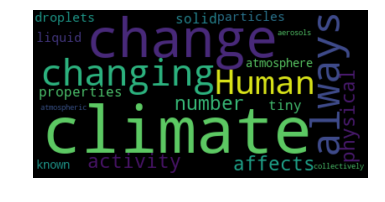

In [48]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [30]:
# write code here
###expanding contractions
import re
from nltk.stem import RegexpStemmer
contractions = [(r'can\'t', 'cannot'),
               (r'haven\'t', 'have not'),
                (r'(\w+)\'ll', '\g<1> will'),
                (r'(\w+)\'r', '\g<1> are'),
               (r'I\'m', 'I am')]

class contra_rep(object):
    def __init__(self,contractions):
        self._contraction_regexes = [(re.compile(p), replaced_text) for p, replaced_text in contractions]
    
    def _contraction_norm(self,text):
        for contraction_regex, replaced_text in self._contraction_regexes:
            text = contraction_regex.sub(replaced_text, text)
        return text 

    

# I have include a sample ooutput. Your output can be different

In [105]:
#expanding contractions from sample text
sample_contraction_replacer = contra_rep(contractions)
sample_contraction_replacer._contraction_norm("We'll go far and I'm going to be there.")


'We will go far and I am going to be there.'

In [107]:
#expanding contractions from given text
sample_contraction_replacer._contraction_norm(text)

'climate change. Climate always changing. Human activity also affects climate changes number physical properties tiny solid particles liquid droplets atmosphere, known collectively atmospheric aerosols'

In [49]:
#Removing stopwords from given text. 
from nltk.corpus import stopwords
text1 = []
text = text.split()
for word in text:
    if word not in stopwords.words('english'):
        text1.append(word)
text = ' '.join(text1)
text
#filtered_words = [word for word in word_list if word not in stopwords.words('english')]

'climate change. Climate always changing. Human activity also affects climate changes number physical properties tiny solid particles liquid droplets atmosphere, known collectively atmospheric aerosols'

In [64]:
#Lemmatization of word from given text.
from nltk.stem import WordNetLemmatizer
wnetl = WordNetLemmatizer()
wnetl.lemmatize('changing', "v"))

change


(-0.5, 399.5, 199.5, -0.5)

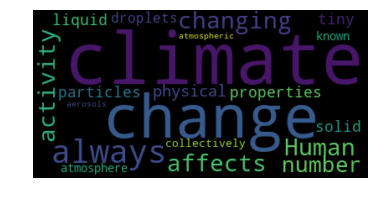

In [68]:
import wordcloud
import matplotlib.pyplot as plt

wc = WordCloud().generate(text)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

# Homework ends
# Final thoughts
He haven't done all the cleanup or used all the attributes for EDA.I just want to highlight one more clean up activity related to language.

In [72]:
import enchant

In [73]:
dictionary = enchant.Dict('en')

In [70]:
climate_feed_df['text'].loc[5217]

'去LACMA那么多次，都没意识到旁边的Tar Pits是啥…\n一直以为是摆几个造型给小朋友们玩的公园…\n站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋'

In [74]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]

[False, False, False, False, False]